In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import statsmodels.api as sm

**Creating the dataset**

In [87]:
X , y = make_regression(n_samples=100 , n_features=1 , n_targets=1 , noise=10)

In [88]:
X = pd.DataFrame(X , columns=['Input'])
y = pd.DataFrame(y , columns=['Target'])

In [89]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=23)

In [90]:
X_train

,Input
85,-1.432657
28,0.491069
8,0.168406
11,0.462796
63,-1.096587
...,...
31,-1.077985
54,1.342058
73,-1.257397
40,-1.051528


**Model Building**

In [91]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [92]:
model = sm.OLS(y_train , X_train).fit()

In [93]:
y_pred = model.predict(X_test)
y_pred

26   -3.284022
80    0.416348
82    0.741543
68   -0.165655
77   -1.447356
37   -3.625188
3     0.048237
55    1.974118
20   -0.678771
17   -1.114606
72   -1.741748
24   -0.561863
71   -4.313901
87    0.692717
89   -3.764487
29    3.538799
9     2.988218
67    0.731198
42   -5.146618
94   -0.102816
dtype: float64

**Evaluation**

In [94]:
r2_score(y_test , y_pred)

0.09749629335305787

In [95]:
mean_squared_error(y_test , y_pred)

43.18435753341951

In [96]:
np.sqrt(mean_squared_error(y_test , y_pred))

6.571480619572693

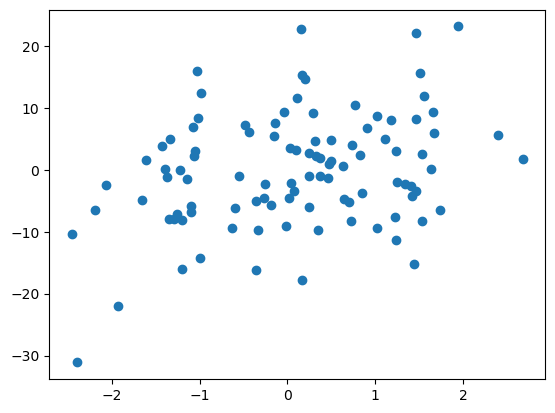

In [97]:
plt.scatter(X, y)  #There is Linear relationship between input and target

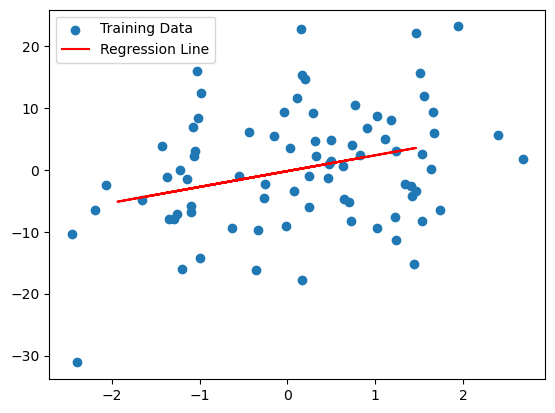

In [98]:
plt.scatter(X_train['Input'] , y_train ,label = 'Training Data')
plt.plot(X_test['Input'] , y_pred ,color='red',  label = 'Regression Line')
plt.legend()

**Assumptions**
* Linear Relationship

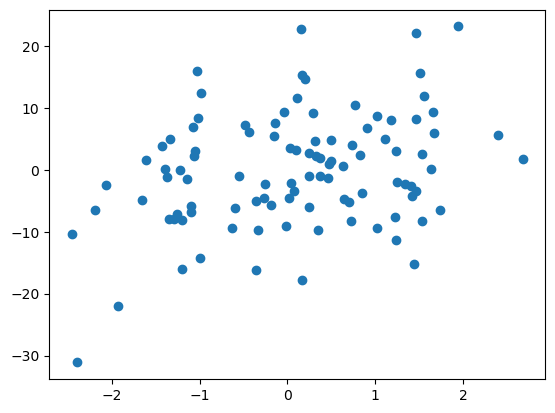

In [99]:
plt.scatter(X,y)

* Independent/Multicolinearity

* Normality

In [100]:
resid = model.resid

<Axes: ylabel='Density'>

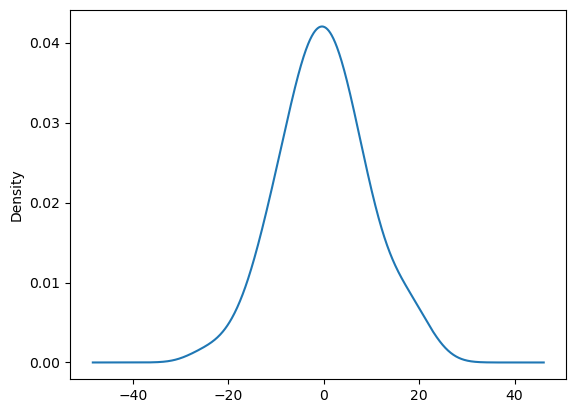

In [101]:
resid.plot(kind='kde')

* Equal varinace / Homoscedasticity

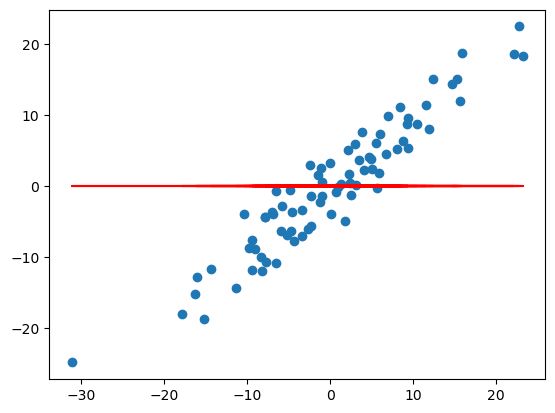

In [102]:
plt.scatter(y_train , resid)
plt.plot(y_train,[0]*y_train , color='red')

* No Auto correlation

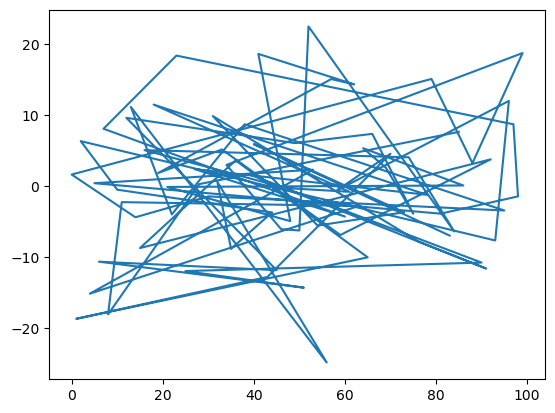

In [108]:
plt.plot(resid.index , resid)

* Error should be independant of input feature
#There should not be relationhip between resuals and inputs

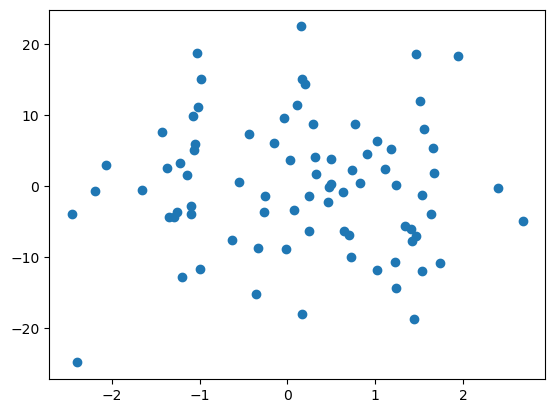

In [111]:
plt.scatter(X_train['Input'] ,resid)